In [34]:
from preparing_script import agrofiz_plot, SVD_vis, Kvu, ob_ves_plot
import pandas as pd 
import numpy as np 
import scipy 
from scipy.stats import f_oneway as ANOVA
from itertools import cycle

import seaborn as sns 
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Задачи 
- Бар плоты по фракциям сухого и мокрого просеивания 
- Лепестковые диаграмы  (https://python-graph-gallery.com/radar-chart/)
- Статистистика по всем объектам (с графикой и опсательными статистиками)

## Сухое просеивание 

In [5]:
suhoe = pd.read_csv('data/сухое просеивание все объекты.csv', index_col= 0)

In [10]:
test_df = suhoe[(suhoe["region"] == 'урожайное') & (suhoe["Год"] == 2022)]

In [13]:
test_df.columns

Index(['Размер агрегатов, мм', 'Вес, г', 'Поврторность', 'GPS №', 'Год',
       'Тип обработки', 'region', 'Вес монолита, г',
       'Содержание агрегатов, %'],
      dtype='object')

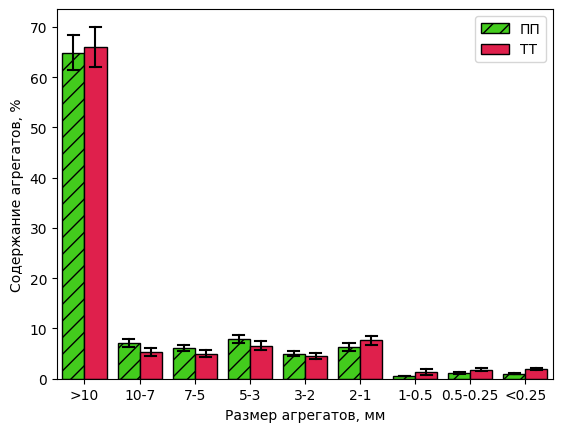

In [63]:
ax = sns.barplot(test_df,
            y="Содержание агрегатов, %",
            x="Размер агрегатов, мм",
            hue="Тип обработки",
            palette = "prism",
            edgecolor = "black",
            errcolor = "black",
            errorbar = 'se',
            capsize = 0.2,
            errwidth = 1.5)

for i, patch in enumerate(ax.patches):
        if i < len(ax.patches)/2:
            patch.set_hatch("//")
        
ax.legend(loc='best')


In [57]:
len(ax.patches)

18

### Коэф структурности

F_onewayResult(statistic=0.09256100972374928, pvalue=0.7657615565264019)

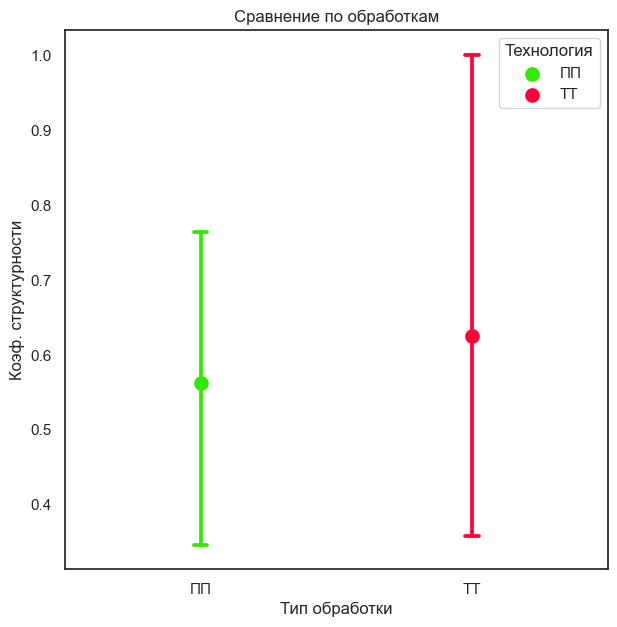

In [7]:
stats, aov, fig = agrofiz_plot(agrofiz, 'Коэф. структурности')
aov


In [6]:
stats

Коэф. структурности                    
                             mean       std variation
Тип обработки                                        
ПП                       0.754630  0.196471  0.232868
ТТ                       0.879442  0.547391  0.556718

### СВД воздушно сухие

F_onewayResult(statistic=0.557514244018155, pvalue=0.4685529177654608)

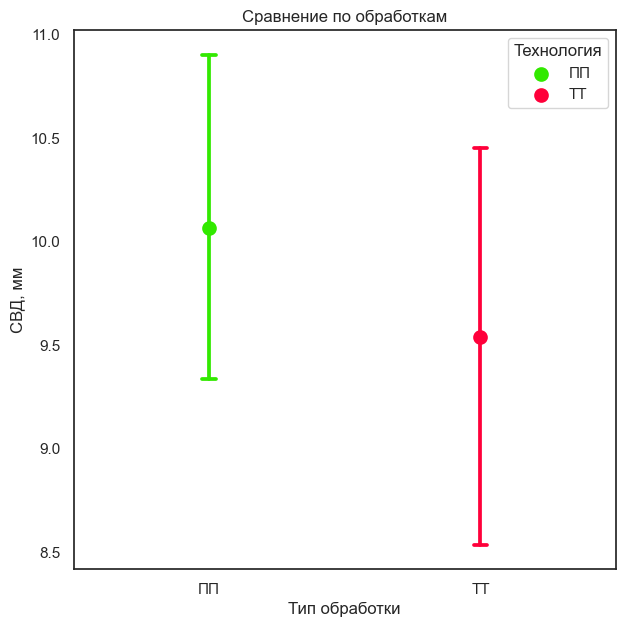

In [9]:
stats, aov, fig = agrofiz_plot(agrofiz, 'СВД, мм')
aov


In [10]:
stats

СВД, мм                    
                    mean       std variation
Тип обработки                               
ПП             10.067986  1.347680  0.126202
ТТ              9.540068  1.331543  0.127413

### СВД водоустойчивые 

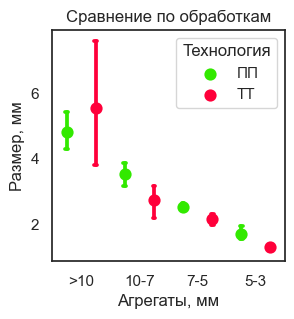

,агрегаты,P-val
0,"СВД водоустойчивые >10, мм",0.449237
1,"СВД водоустойчивые 10-7, мм",0.031635
2,"СВД водоустойчивые 7-5, мм",0.008729
3,"СВД водоустойчивые 5-3, мм",0.012583


In [11]:


stats, aov, fig = SVD_vis(agrofiz)
aov

In [12]:
stats

СВД водоустойчивые >10, мм                      \
                                    mean       std variation   
Тип обработки                                                  
ПП                              4.805931  0.932647  0.182963   
ТТ                              5.531060  2.587130  0.426992   

              СВД водоустойчивые 10-7, мм                      \
                                     mean       std variation   
Тип обработки                                                   
ПП                               3.521458  0.571366  0.152973   
ТТ                               2.735688  0.688999  0.229912   

              СВД водоустойчивые 7-5, мм                      \
                                    mean       std variation   
Тип обработки                                                  
ПП                              2.513961  0.221472  0.083059   
ТТ                              2.146469  0.233488  0.099300   

              СВД водоустойчивые 5-3, мм                      
                                    mean       std variation  
Тип обработки                                                 
ПП                              1.705928  0.328187  0.181378  
ТТ                              1.288273  0.150961  0.106971

# курск

In [13]:
agrofiz = pd.read_csv("data/агрофизика_курск.csv")


In [14]:
agrofiz

,Год,GPS №,Тип обработки,повторность,"Содержание 0.25–10 мм, %","Содержание >10, %","Содержание <0.25, %",Коэф. структурности,"СВД, мм","СВД водоустойчивые 10-7, мм","СВД водоустойчивые 5-3, мм","СВД водоустойчивые 7-5, мм","СВД водоустойчивые >10, мм"
0,2019,NaN,ПП,1,0.403684,0.588085,0.008230,0.676964,9.106996,1.333750,0.831250,1.120187,0.932563
1,2019,NaN,ПП,2,0.447378,0.526966,0.025655,0.809556,8.386025,2.011437,0.852812,1.185625,2.714813
2,2019,NaN,ПП,3,0.502054,0.491146,0.006800,1.008250,8.300786,3.207375,1.096563,1.506813,2.732187
3,2019,NaN,ПП,4,0.321712,0.669644,0.008644,0.474299,9.825944,2.183500,0.872625,1.336062,6.419937
4,2019,NaN,ПП,5,0.445702,0.548641,0.005658,0.804083,8.849472,1.772812,0.785625,1.132437,3.675625
5,2019,NaN,ТТ,1,0.311057,0.674146,0.014797,0.451499,9.826951,2.401937,1.014625,1.616687,4.966687
6,2019,NaN,ТТ,2,0.631161,0.352299,0.016540,1.711211,6.609721,1.598500,1.140187,1.242438,2.415000
7,2019,NaN,ТТ,3,0.257853,0.729993,0.012154,0.347443,10.358241,3.200937,0.880562,1.469875,8.581125
8,2019,NaN,ТТ,4,0.449453,0.544659,0.005887,0.816376,8.622014,2.743688,1.192750,1.754500,4.900813
9,2019,NaN,ТТ,5,0.517067,0.475889,0.007044,1.070681,7.898253,3.380250,1.060625,1.706187,5.236937


F_onewayResult(statistic=0.2302805368267326, pvalue=0.6441613429091824)

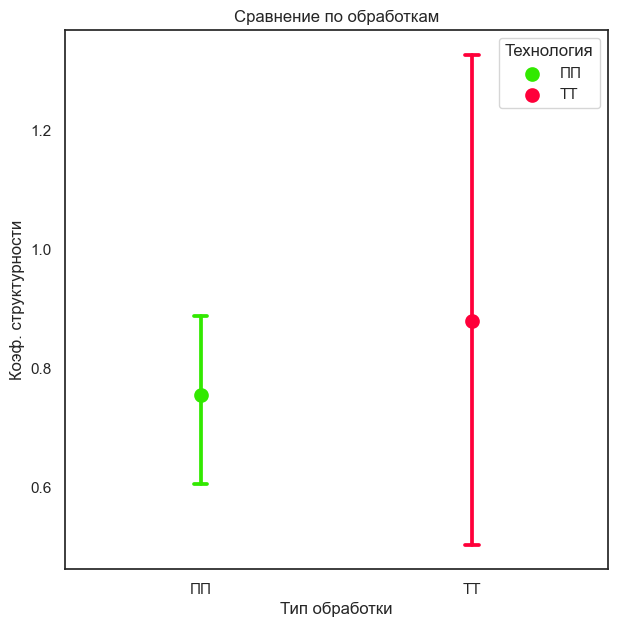

In [15]:
stats, aov, fig = agrofiz_plot(agrofiz, 'Коэф. структурности')
aov


In [16]:
stats


Коэф. структурности                    
                             mean       std variation
Тип обработки                                        
ПП                       0.754630  0.196471  0.232868
ТТ                       0.879442  0.547391  0.556718

СВД воздушно сухие


F_onewayResult(statistic=0.10092454302937615, pvalue=0.7588565913465707)

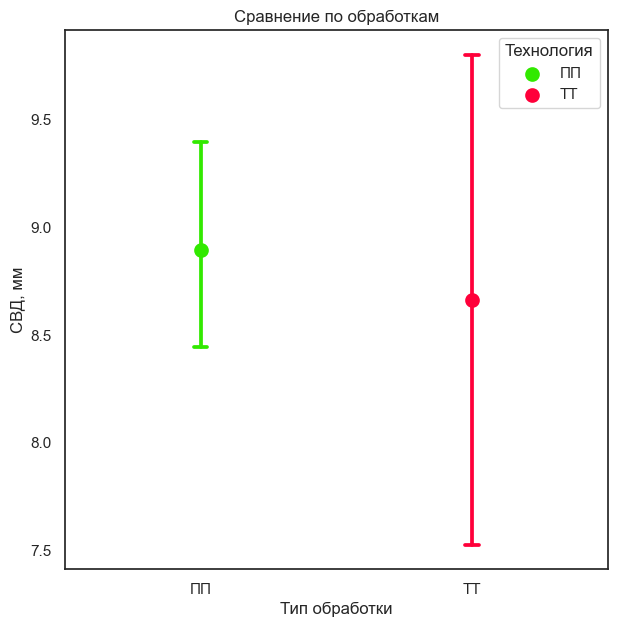

In [17]:
stats, aov, fig = agrofiz_plot(agrofiz, 'СВД, мм')
aov

In [18]:
stats


СВД, мм                    
                   mean       std variation
Тип обработки                              
ПП             8.893845  0.617618  0.062112
ТТ             8.663036  1.502589  0.155137

СВД водоустойчивые


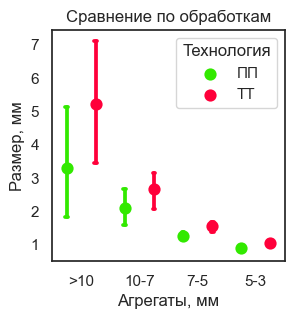

,агрегаты,P-val
0,"СВД водоустойчивые >10, мм",0.186344
1,"СВД водоустойчивые 10-7, мм",0.240456
2,"СВД водоустойчивые 7-5, мм",0.034019
3,"СВД водоустойчивые 5-3, мм",0.056940


In [19]:
stats, aov, fig = SVD_vis(agrofiz)
aov

In [20]:
stats


СВД водоустойчивые >10, мм                      \
                                    mean       std variation   
Тип обработки                                                  
ПП                              3.295025  2.009017  0.545343   
ТТ                              5.220113  2.198381  0.376676   

              СВД водоустойчивые 10-7, мм                      \
                                     mean       std variation   
Тип обработки                                                   
ПП                               2.101775  0.695570  0.296005   
ТТ                               2.665062  0.709159  0.238002   

              СВД водоустойчивые 7-5, мм                      \
                                    mean       std variation   
Тип обработки                                                  
ПП                              1.256225  0.164303  0.116983   
ТТ                              1.557938  0.206979  0.118829   

              СВД водоустойчивые 5-3, мм                      
                                    mean       std variation  
Тип обработки                                                 
ПП                              0.887775  0.121113  0.122021  
ТТ                              1.057750  0.120711  0.102072